In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
data = X.copy()

# variable information 
print(credit_approval.variables) 

   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [4]:
#print dictionary with metadata
for key, value in credit_approval.metadata.items():
    if isinstance(value, dict):
        for k, v in value.items():
            print(f'{k}: {v}')
    else:
        print(f'{key}: {value}')

uci_id: 27
name: Credit Approval
repository_url: https://archive.ics.uci.edu/dataset/27/credit+approval
data_url: https://archive.ics.uci.edu/static/public/27/data.csv
abstract: This data concerns credit card applications; good mix of attributes
area: Business
tasks: ['Classification']
characteristics: ['Multivariate']
num_instances: 690
num_features: 15
feature_types: ['Categorical', 'Integer', 'Real']
demographics: []
target_col: ['A16']
index_col: None
has_missing_values: yes
missing_values_symbol: NaN
year_of_dataset_creation: 1987
last_updated: Wed Aug 23 2023
dataset_doi: 10.24432/C5FS30
creators: ['J. R. Quinlan']
intro_paper: None
summary: This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
  
This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values.  There are also a

In [5]:
dataset = pd.concat([X, y], axis=1)

### EDA

In [7]:
dataset.shape

(690, 16)

In [8]:
dataset.describe()

,A15,A14,A11,A8,A3,A2
count,690.000000,677.000000,690.00000,690.000000,690.000000,678.000000
mean,1017.385507,184.014771,2.40000,2.223406,4.758725,31.568171
std,5210.102598,173.806768,4.86294,3.346513,4.978163,11.957862
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000
25%,0.000000,75.000000,0.00000,0.165000,1.000000,22.602500
50%,5.000000,160.000000,0.00000,1.000000,2.750000,28.460000
75%,395.500000,276.000000,3.00000,2.625000,7.207500,38.230000
max,100000.000000,2000.000000,67.00000,28.500000,28.000000,80.250000


In [9]:
dataset.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,A16
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,+
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,+
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,+
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,+
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,+


<Axes: >

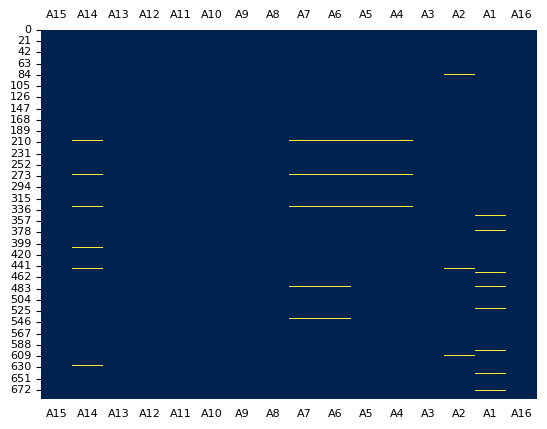

In [10]:
#visualize missing values
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = True, bottom=False, top = False, labeltop=True)
sns.heatmap(dataset.isna(), cbar=False, cmap='cividis')

In [11]:
#share of missing values
nan_freq = dataset.isna().mean()
nan_freq.sort_values(ascending=False).head(10).round(2)

A14    0.02
A2     0.02
A1     0.02
A7     0.01
A6     0.01
A5     0.01
A4     0.01
A15    0.00
A13    0.00
A12    0.00
dtype: float64

In [12]:
#types of features
dataset.dtypes.value_counts()

object     10
float64     4
int64       2
Name: count, dtype: int64

In [13]:
#number of unique values in catagorical features
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

A13     3
A12     2
A10     2
A9      2
A7      9
A6     14
A5      3
A4      3
A1      2
A16     2
dtype: int64

<Axes: >

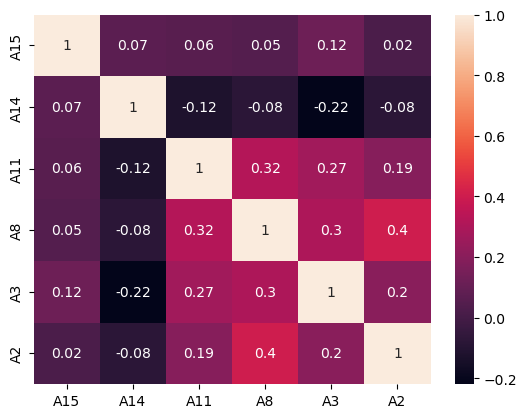

In [14]:
#correlation between numerical features
sns.heatmap(dataset.select_dtypes(['float64', 'int64']).corr().round(2), annot=True)

### Encode categorical features

In [16]:
#encode cayegorical features with 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in dataset:
    if dataset[col].dtype == 'object':
        if len(dataset[col].unique()) <= 2:
            dataset[col] = le.fit_transform(dataset[col])
            le_count += 1

print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [17]:
# one-hot encoding of categorical variables with more than two unique values
dataset = pd.get_dummies(dataset, dtype='int')

In [18]:
dataset.dtypes.value_counts()

int64      40
float64     4
Name: count, dtype: int64

In [19]:
dataset.head()

,A15,A14,A12,A11,A10,A9,A8,A3,A2,A16,...,A6_w,A6_x,A5_g,A5_gg,A5_p,A4_l,A4_u,A4_y,A1_a,A1_b
0,0,202.0,0,1,1,1,1.25,0.000,30.83,0,...,1,0,1,0,0,0,1,0,0,1
1,560,43.0,0,6,1,1,3.04,4.460,58.67,0,...,0,0,1,0,0,0,1,0,1,0
2,824,280.0,0,0,0,1,1.50,0.500,24.50,0,...,0,0,1,0,0,0,1,0,1,0
3,3,100.0,1,5,1,1,3.75,1.540,27.83,0,...,1,0,1,0,0,0,1,0,0,1
4,0,120.0,0,0,0,1,1.71,5.625,20.17,0,...,1,0,1,0,0,0,1,0,0,1


<Axes: ylabel='Frequency'>

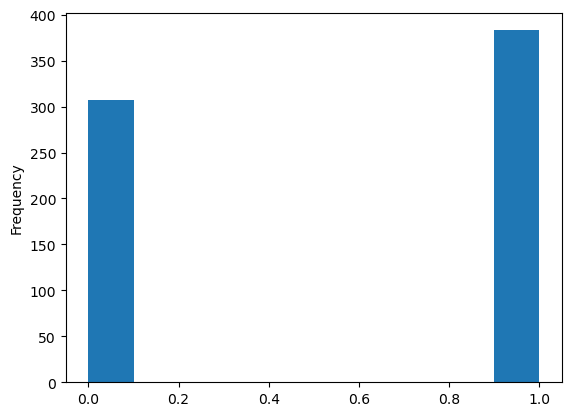

In [20]:
#plot target column
dataset['A16'].plot.hist()

### Sklearn DecisionTreeClassifier model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [23]:
# scaling, filling gaps, kfold validation
X = dataset.drop(columns = ['A16'])
y = dataset['A16']

pipeline = make_pipeline(SimpleImputer(strategy='median'),  # Handle missing values
                         MinMaxScaler(feature_range=(0, 1)),
                         DecisionTreeClassifier() 
                        )

cv_results = cross_validate(pipeline,
                            X, y,
                            cv=5,
                            scoring=['roc_auc', 'accuracy'],
                            return_train_score=False
                           )

mean_test_roc_auc = cv_results['test_roc_auc'].mean()
mean_test_acc = cv_results['test_accuracy'].mean()

print(f"ROC AUC from Cross-Validation: {mean_test_roc_auc:.3f}")
print("Fold Scores:", cv_results['test_roc_auc'])
print(f"Accuracy from Cross-Validation: {mean_test_acc:.3f}")
print("Fold Scores:", cv_results['test_accuracy'])

ROC AUC from Cross-Validation: 0.796
Fold Scores: [0.63921902 0.86014431 0.84969129 0.76868214 0.86097509]
Accuracy from Cross-Validation: 0.796
Fold Scores: [0.63043478 0.86231884 0.85507246 0.76086957 0.86956522]


### Model tuning with GridSearchCV

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
dt = DecisionTreeClassifier(random_state=100)

In [27]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [28]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [29]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [30]:
print(grid_search.best_estimator_)
print('Accuracy: ',grid_search.best_score_.round(3))

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=100)
Accuracy:  0.867


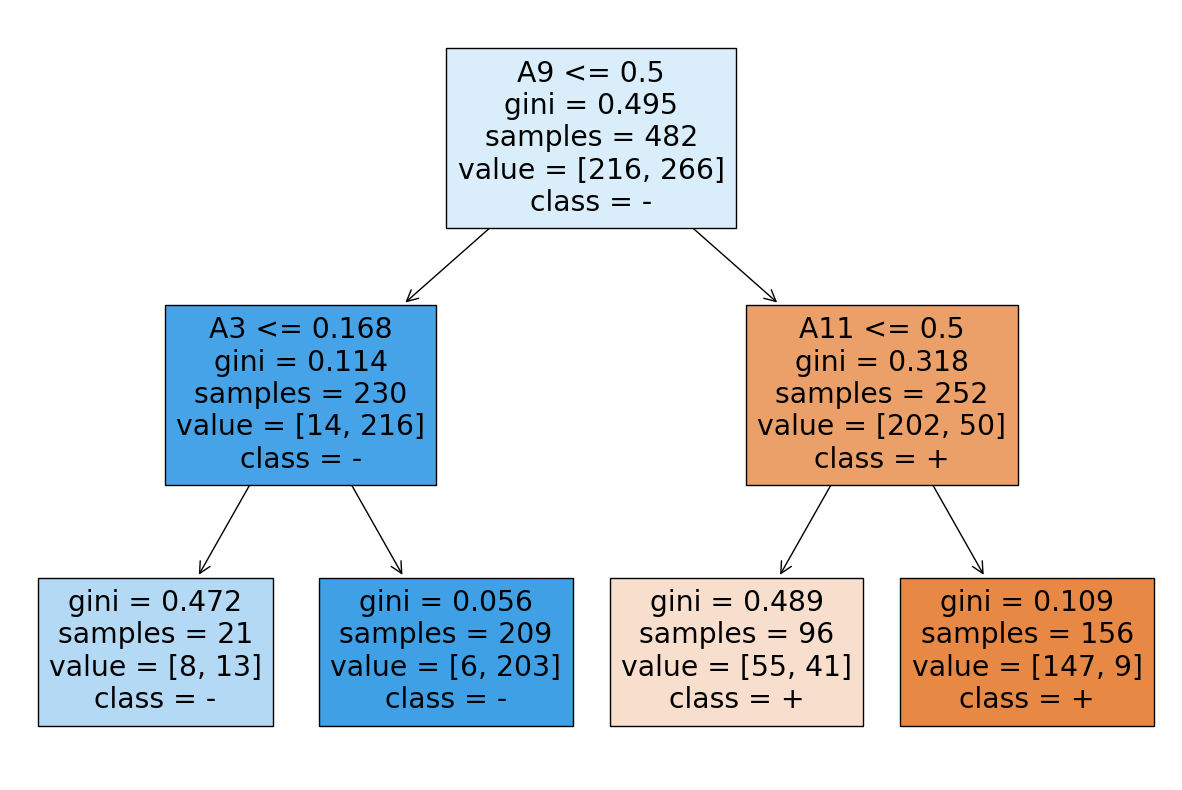

In [31]:
#visualize tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15,10))
_ = plot_tree(grid_search.best_estimator_,
              feature_names=X.columns,
              class_names=['+', "-"],
              filled=True
             )

In [32]:
#kfold validation of best model
X = dataset.drop(columns = ['A16'])
y = dataset['A16']

pipeline = make_pipeline(SimpleImputer(strategy='median'),  # Handle missing values
                         grid_search.best_estimator_,
                        )

cv_results = cross_validate(pipeline,
                            X, y,
                            cv=5,
                            scoring=['roc_auc', 'accuracy'],
                            return_train_score=False
                           )

mean_test_roc_auc = cv_results['test_roc_auc'].mean()
mean_test_acc = cv_results['test_accuracy'].mean()

print(f"ROC AUC from Cross-Validation: {mean_test_roc_auc:.3f}")
print("Fold Scores:", cv_results['test_roc_auc'])
print(f"Accuracy from Cross-Validation: {mean_test_acc:.3f}")
print("Fold Scores:", cv_results['test_accuracy'])

ROC AUC from Cross-Validation: 0.907
Fold Scores: [0.74267827 0.98174873 0.99031297 0.83713008 0.98083883]
Accuracy from Cross-Validation: 0.855
Fold Scores: [0.62318841 0.97101449 0.98550725 0.76086957 0.93478261]


### Categorical Decision Tree from scratch

In [34]:
#import file with new classifier
import tree

In [35]:
dtc = tree.DecisionTreeCategory(max_depth=5)

In [36]:
X = data.select_dtypes(include=['object'])
y = dataset['A16']
pd.concat([X, y], axis=1).head()

,A13,A12,A10,A9,A7,A6,A5,A4,A1,A16
0,g,f,t,t,v,w,g,u,b,0
1,g,f,t,t,h,q,g,u,a,0
2,g,f,f,t,h,q,g,u,a,0
3,g,t,t,t,v,w,g,u,b,0
4,s,f,f,t,v,w,g,u,b,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [38]:
dtc.fit(X_train, y_train)

In [39]:
preds = dtc.predict(X_test)

In [40]:
# accuracy corresponds with sklearn model accuracy
accuracy_score(y_test, preds)

0.8269230769230769

In [41]:
dtc.print_tree()

A9=f?
-----(T) A13=p?
----------(T) A1=a?
---------------(T) 0
---------------(F) A12=f?
--------------------(T) 0
--------------------(F) 0
----------(F) A7=ff?
---------------(T) 1
---------------(F) A7=n?
--------------------(T) A12=t?
-------------------------(T) 1
-------------------------(F) 0
--------------------(F) A6=x?
-------------------------(T) 1
-------------------------(F) 1
-----(F) A10=t?
----------(T) A6=q?
---------------(T) A5=g?
--------------------(T) A12=f?
-------------------------(T) 0
-------------------------(F) 0
--------------------(F) 0
---------------(F) A6=k?
--------------------(T) A12=t?
-------------------------(T) 1
-------------------------(F) 0
--------------------(F) A6=ff?
-------------------------(T) 0
-------------------------(F) 0
----------(F) A6=d?
---------------(T) 1
---------------(F) A6=x?
--------------------(T) 0
--------------------(F) A6=e?
-------------------------(T) 0
-------------------------(F) 0
